# 7 - Spectrograms

Loads depth-frequency-time data and then plots spectrograms for various circumstances.

## Imports
Necessary modules for analysis.

In [1]:
# import modules

import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as pldates
import numpy as np
for i in range(2):
    %matplotlib notebook

In [31]:
# import data

adcp = 'Slope'     # Slope(2013,2014,2017,2018), Axis75(2013,2014), Axis55(2017,2018)
year = 2018
ds_in = xr.open_dataset(f'../Data/data/spectro/spectro_{adcp}_{year}_0.nc')

n_seg = ds_in.n_seg
if n_seg > 1:
    ds = [ds_in]
    for i in range(n_seg):
        if i > 0:
            ds_temp = xr.open_dataset(f'../Data/data/spectro/spectro_{adcp}_{year}_{i}.nc')
            ds.append(ds_temp)
elif n_seg == 1:
    ds = [ds_in]

#print(ds)

In [32]:
# extract plotting variables & GM

t_stamp = int(ds[0].t_stamp)
start_date = dt.datetime(t_stamp,1,1)                                   # input start date in YYYY,MM,DD
end_date = dt.datetime(t_stamp+1,1,1)                                   # input end date in YYYY,MM,DD
depth = ds[0].depth.values
f = ds[0].specf.values

## Depth comparison spectrograms (annual)

In [33]:
# select depths

dupidx = 0                                     # upper depth
dlowidx = -1                                   # lower depth
dup_stamp = -depth[dupidx]                     # stamps for plotting
dlow_stamp = -depth[dlowidx]
print('Upper depth:',dup_stamp)
print('Lower depth:',dlow_stamp)

Upper depth: -99
Lower depth: -355


<IPython.core.display.Javascript object>


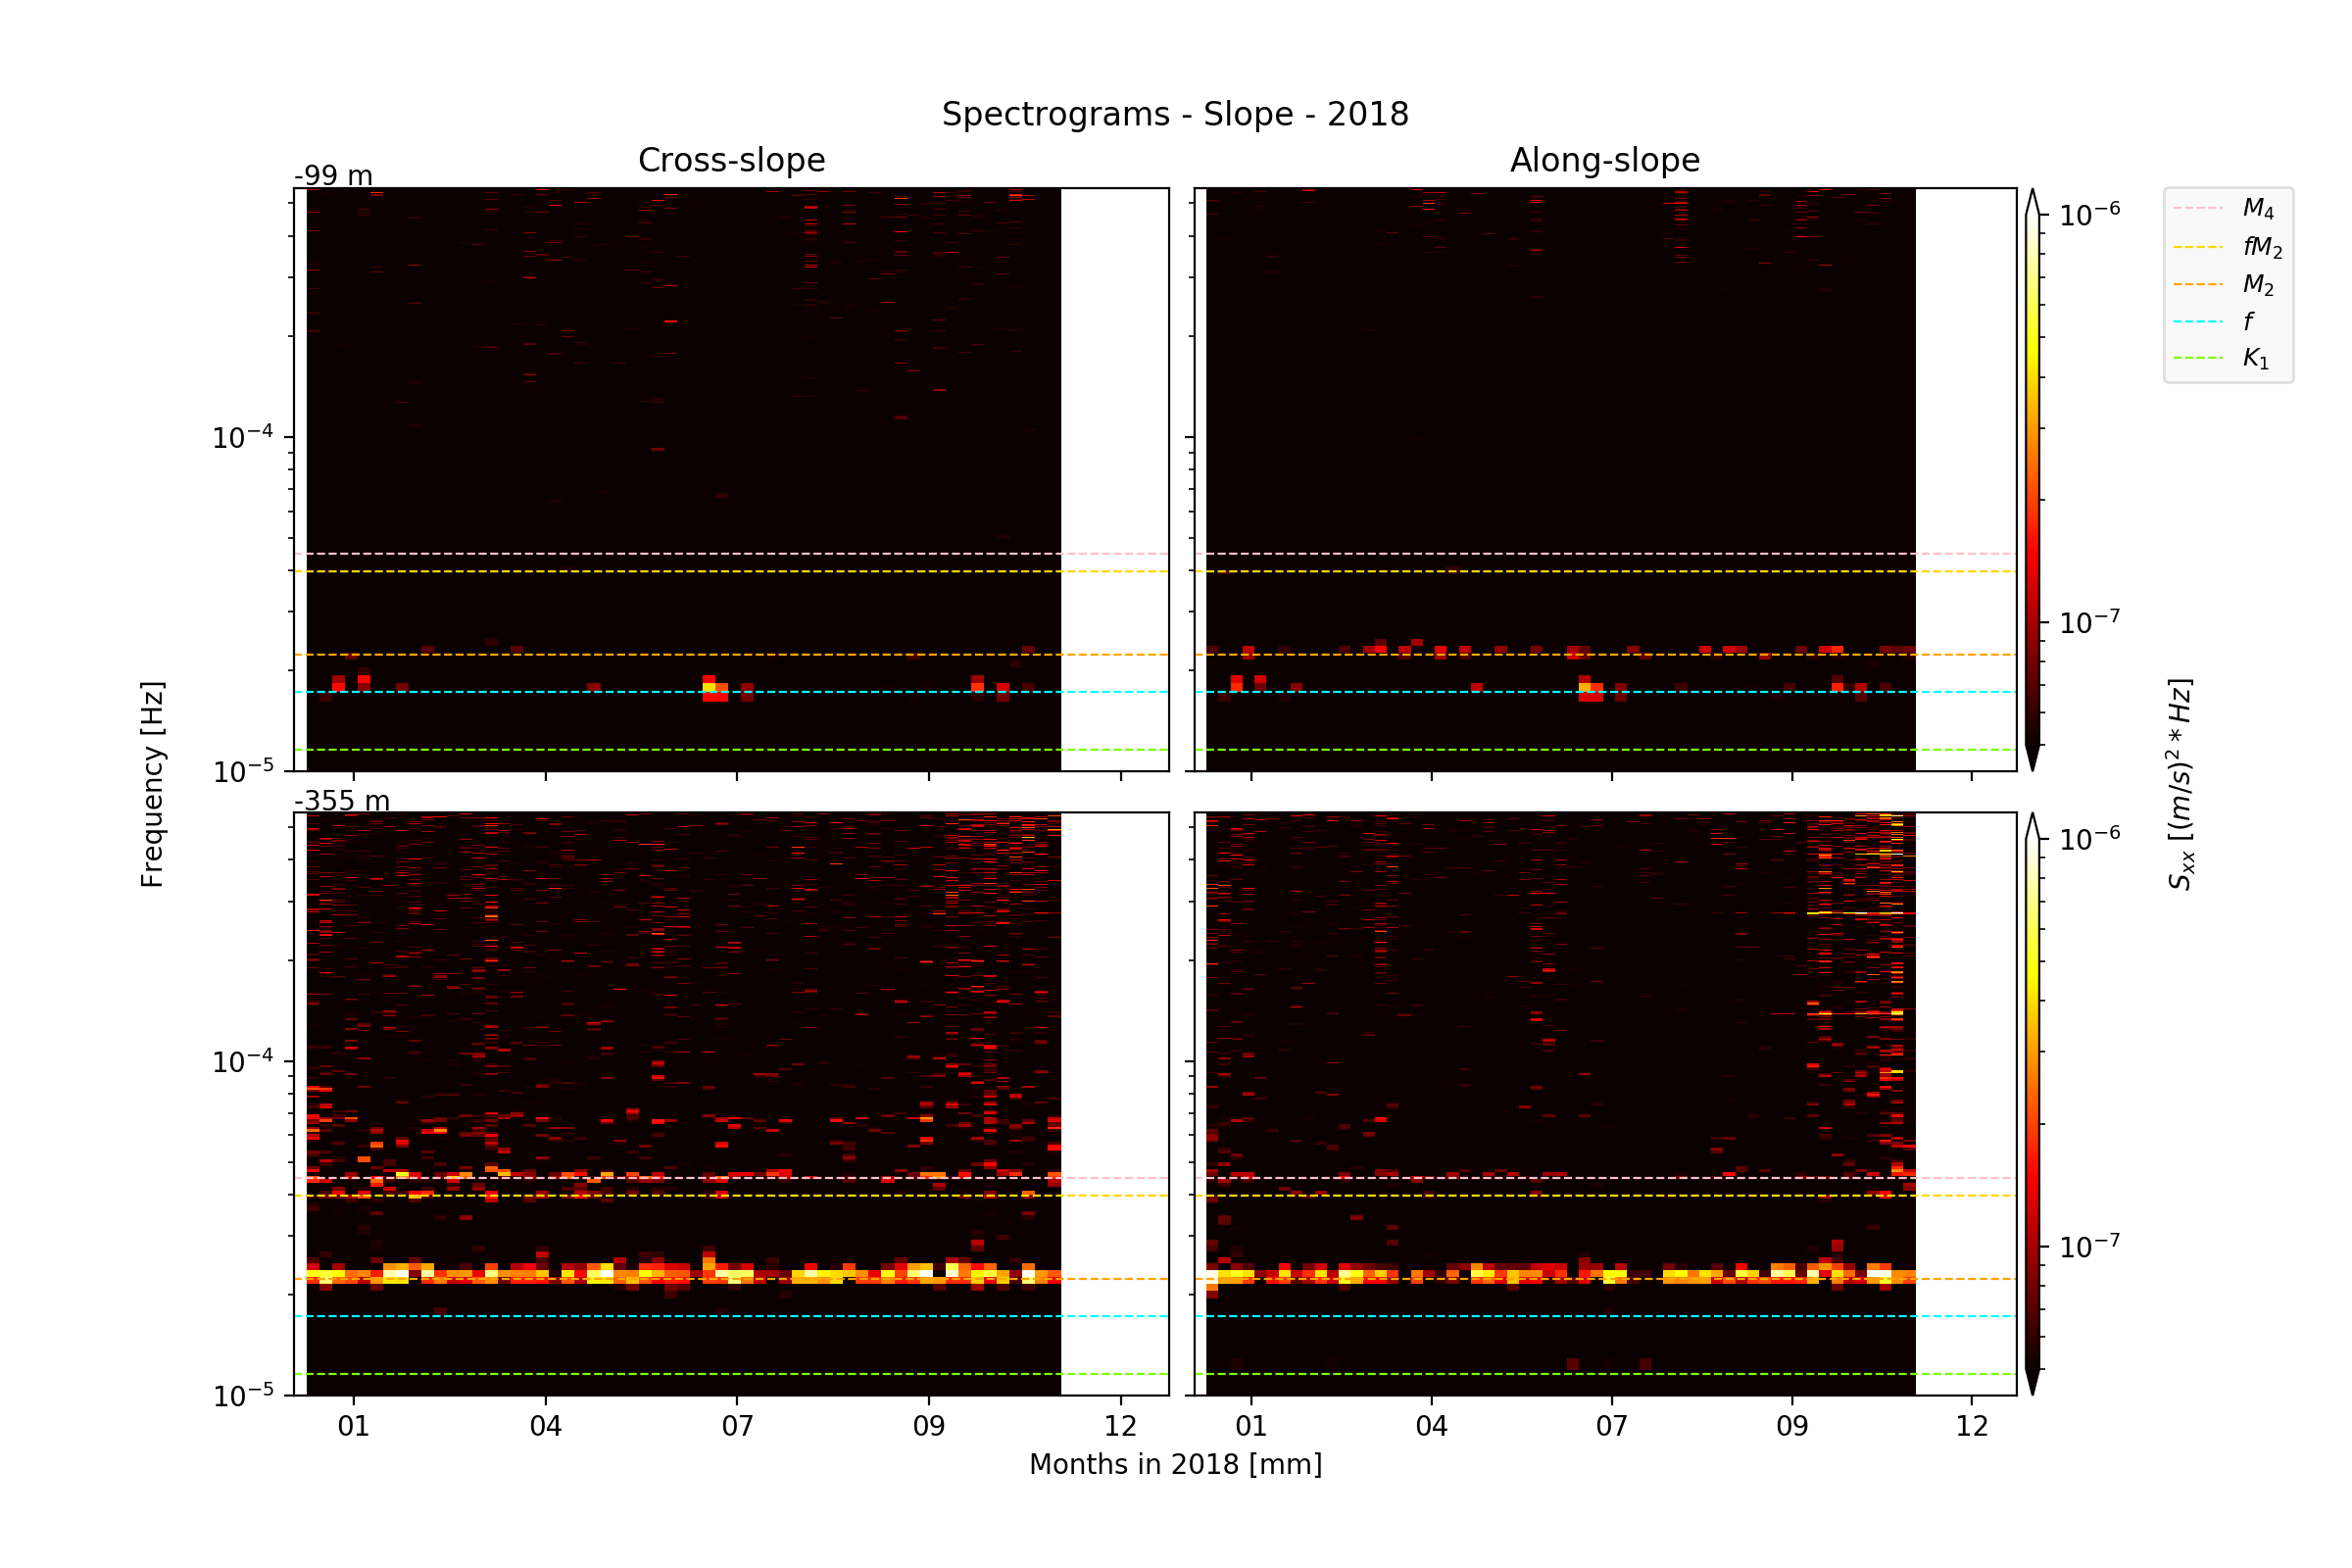

In [34]:
# plot spectrogram

fig, axs = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)
(ax0,ax1),(ax2,ax3) = axs
fig.subplots_adjust(hspace=0.07, wspace=0.03)
fig.text(0.5, 0.92, f'Spectrograms - {adcp} - {t_stamp}', ha='center', fontsize=12)
fig.text(0.06, 0.5, 'Frequency [Hz]', va='center', rotation='vertical')
fig.text(0.92, 0.5, '$S_{xx}$ [$(m/s)^2*Hz$]', va='center', rotation='vertical')
fig.text(0.5, 0.06, f'Months in {t_stamp} [mm]', ha='center')
fig.text(0.125,0.882,f'{dup_stamp} m')
fig.text(0.125,0.483,f'{dlow_stamp} m')
ax0.set_title('Cross-slope')
ax1.set_title('Along-slope')

vmin = 5e-8
vmax = 1e-6


for i in range(n_seg):
    im0 = ax0.pcolormesh(ds[i].spect, ds[i].specf, ds[i].Sxxu_white[0,:,:], rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='hot')  
    im1 = ax1.pcolormesh(ds[i].spect, ds[i].specf, ds[i].Sxxv_white[0,:,:], rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='hot')  
    im2 = ax2.pcolormesh(ds[i].spect, ds[i].specf, ds[i].Sxxu_white[-1,:,:], rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='hot')
    im3 = ax3.pcolormesh(ds[i].spect, ds[i].specf, ds[i].Sxxv_white[-1,:,:], rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='hot')  

cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar3 = fig.colorbar(im3, ax=ax3, fraction=0.05, pad=0.01, aspect=40, extend='both')    

ax0.set_yscale('log')
ax0.set_ylim(1e-5,5.55e-4)
date_form = pldates.DateFormatter("%m")
ax0.xaxis.set_major_formatter(date_form)
ax0.set_xlim(start_date,end_date)
ax0.xaxis.set_major_locator(plt.MaxNLocator(6))

ax0.axhline(4.472e-5, color ='pink',ls='--',lw=0.8,label = "$M_4$")
ax0.axhline(3.968e-5, color ='gold',ls='--',lw=0.8,label = "$fM_2$")
ax0.axhline(2.236e-5, color ='orange',ls='--',lw=0.8,label = "$M_2$")
ax0.axhline(1.732e-5, color ='cyan',ls='--', lw=0.8,label = "$f$") 
ax0.axhline(1.161e-5, color ='lawngreen',ls='--',lw=0.8,label = "$K_1$") 
ax1.axhline(4.472e-5, color ='pink',ls='--',lw=0.8)
ax1.axhline(3.968e-5, color ='gold',ls='--',lw=0.8)
ax1.axhline(2.236e-5, color ='orange',ls='--',lw=0.8)
ax1.axhline(1.732e-5, color ='cyan',ls='--', lw=0.8) 
ax1.axhline(1.161e-5, color ='lawngreen',ls='--',lw=0.8) 
ax2.axhline(4.472e-5, color ='pink',ls='--',lw=0.8)
ax2.axhline(3.968e-5, color ='gold',ls='--',lw=0.8)
ax2.axhline(2.236e-5, color ='orange',ls='--',lw=0.8)
ax2.axhline(1.732e-5, color ='cyan',ls='--', lw=0.8) 
ax2.axhline(1.161e-5, color ='lawngreen',ls='--',lw=0.8) 
ax3.axhline(4.472e-5, color ='pink',ls='--',lw=0.8)
ax3.axhline(3.968e-5, color ='gold',ls='--',lw=0.8)
ax3.axhline(2.236e-5, color ='orange',ls='--',lw=0.8)
ax3.axhline(1.732e-5, color ='cyan',ls='--', lw=0.8) 
ax3.axhline(1.161e-5, color ='lawngreen',ls='--',lw=0.8) 

plt.subplots_adjust(right=0.88)
fig.legend(loc=(0.92,0.756), framealpha=0.6, facecolor='whitesmoke', fontsize=9, frameon=True)
plt.show()

plt.savefig(fname=f'./plots/spectro_plots/spectro_{adcp}_{t_stamp}.pdf',format='pdf')